Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


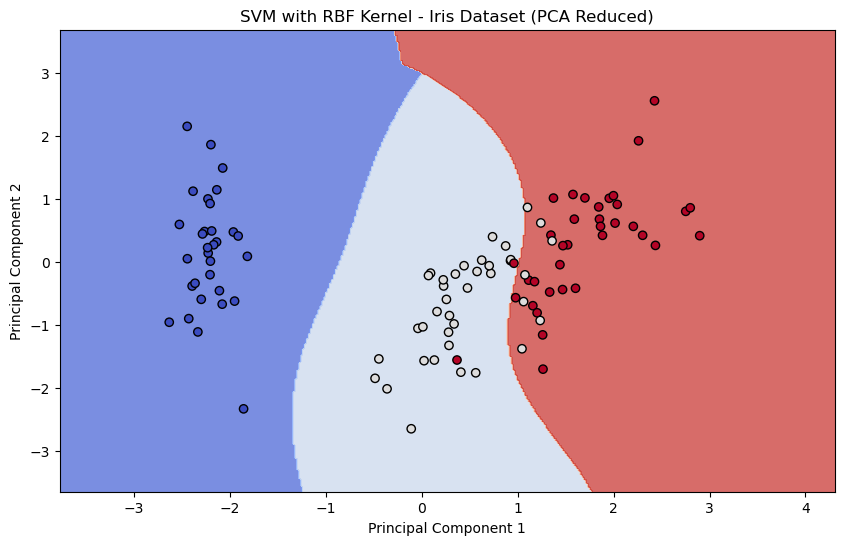

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score

from sklearn.decomposition import PCA

iris = pd.read_csv('iris.csv')

X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

svm_model = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.3, random_state=42)

svm_model_pca = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_model_pca.fit(X_train_pca, y_train)

h = 0.02
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.title('SVM with RBF Kernel - Iris Dataset (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()